In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv('WineQT.csv')

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Hur många datapunkter och attribut finns det?

In [27]:
print(df.shape)

(1143, 13)


# Hur många klasser av kvalitet finns det?

In [28]:
print(df['quality'].nunique())

unique_qualities = df['quality'].unique()
print("Unique quality values:", unique_qualities)

6
Unique quality values: [5 6 7 4 8 3]


# Hur ser distributionen ut för de olika attributen?

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Finns det något attribut som inte borde användas?

fixed acidity


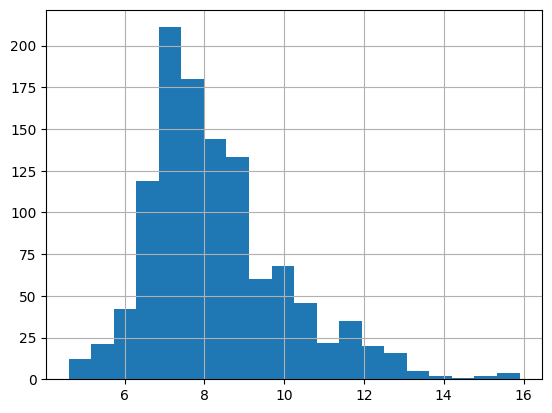

volatile acidity


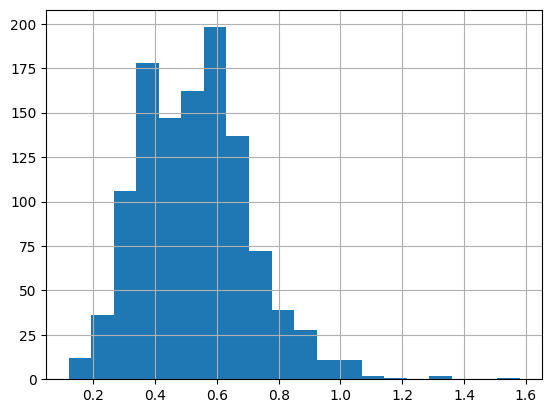

citric acid


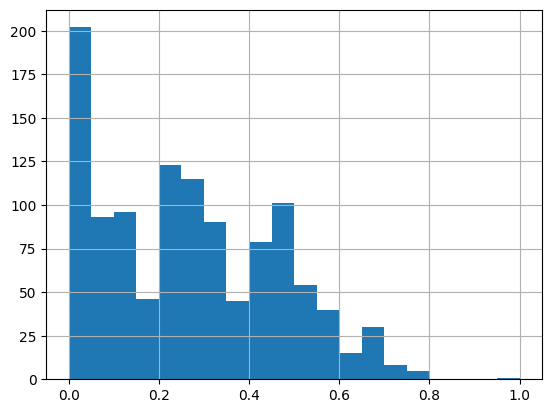

residual sugar


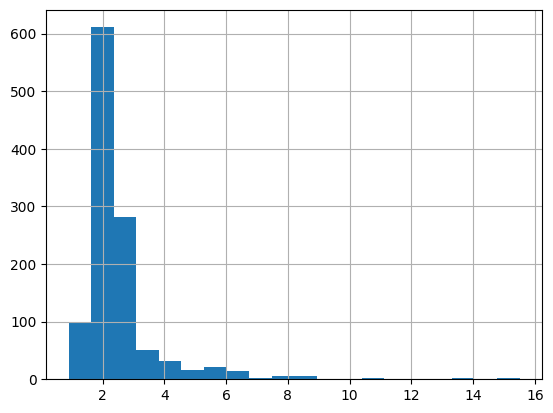

chlorides


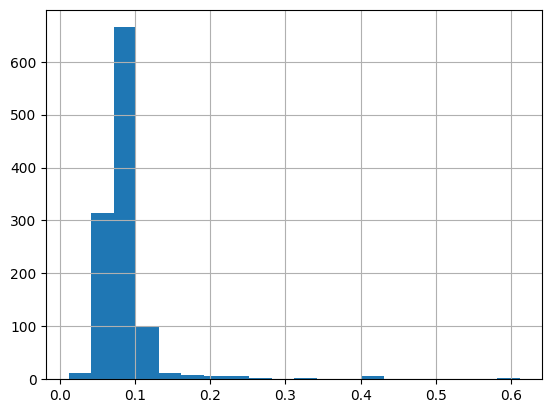

free sulfur dioxide


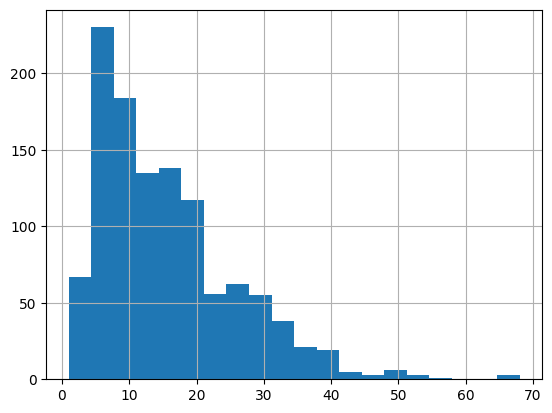

total sulfur dioxide


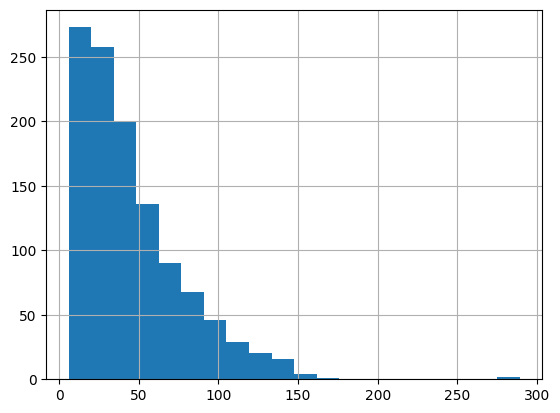

density


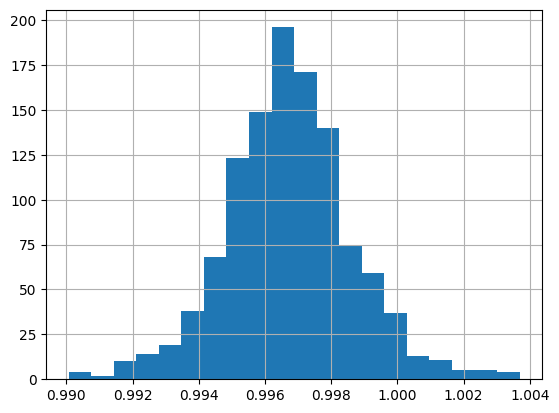

pH


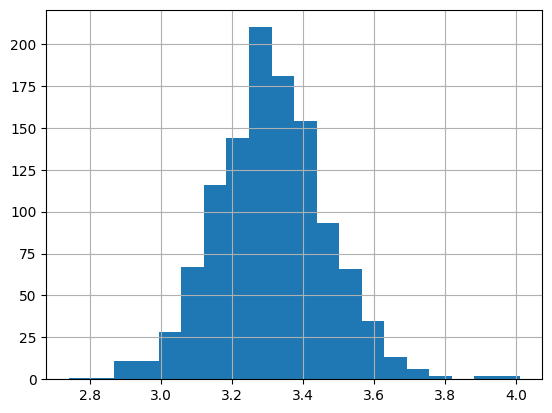

sulphates


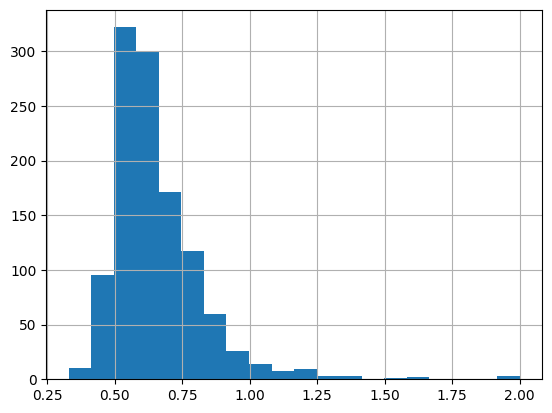

alcohol


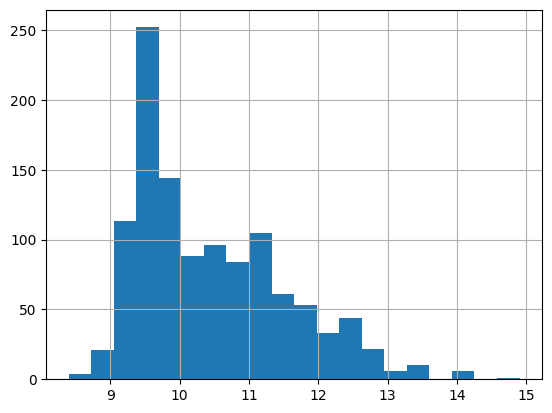

quality


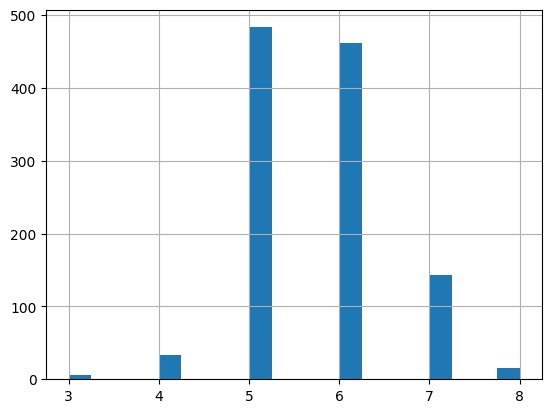

Id


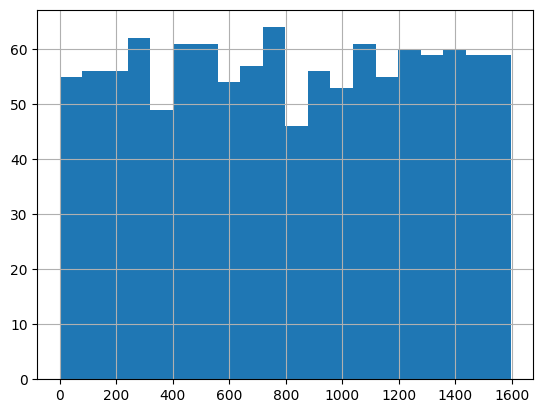

In [30]:
for column in df.columns:
    print(column)
    df[column].hist(bins=20)
    plt.show()

<Axes: >

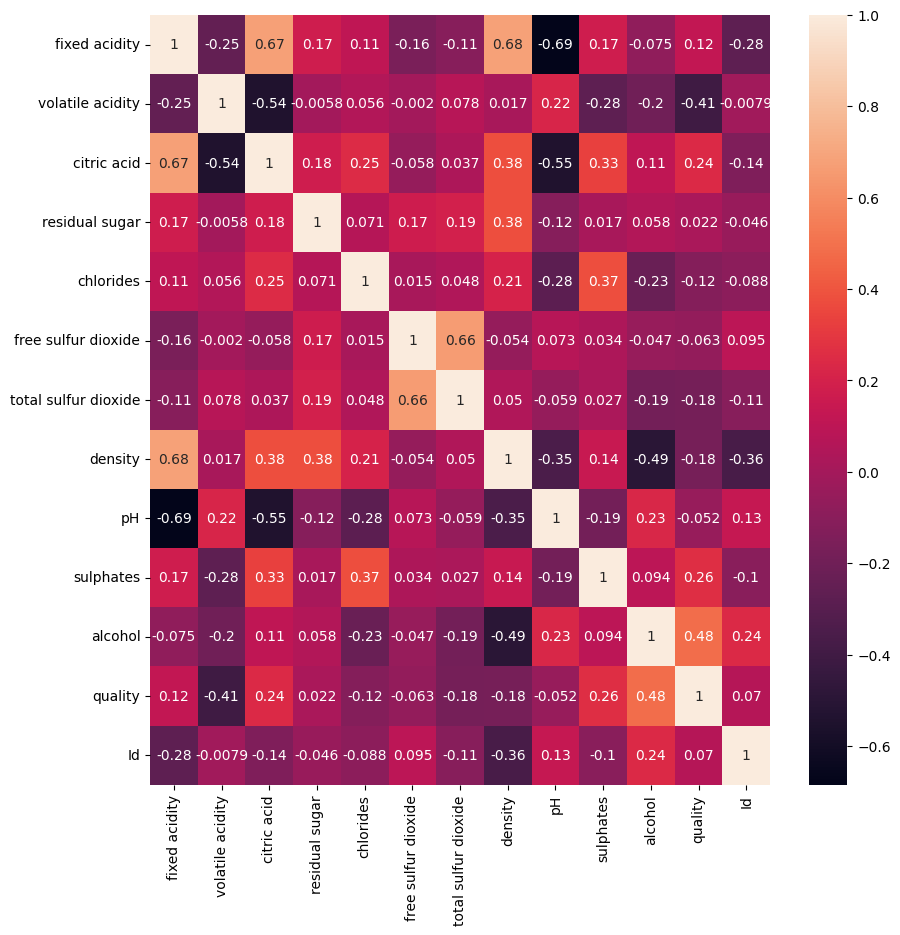

In [31]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

Jag tar bort Id för det kommer inte ge något till modellen.

# Dela upp datan i träning och testset

In [32]:
X = df.drop(columns=['quality','Id'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


# Träna ett beslutsträd på träningssätet och utvärdera modellen på testsätet

In [34]:
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier(random_state=42)

# Parametrarna du vill söka över
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 50, 100, 150,200],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [1, 5, 20,30,50],
}

# Skapa Grid Search-objektet
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Använd den bästa modellen för att göra förutsägelser
best_tree_clf = grid_search.best_estimator_
train_score = accuracy_score(y_train, best_tree_clf.predict(X_train))
test_score = accuracy_score(y_test, best_tree_clf.predict(X_test))
# Skriv ut de bästa parametrarna
print(grid_search.best_params_)
print("Train score: ", train_score)
print("Test score: ", test_score)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.541 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.574 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.552 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.563 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.495 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.546 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.519 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.546 total tim

# Hur djupt är trädet?

In [35]:
print(best_tree_clf.get_depth())

7


# Hur många löv har trädet?

In [36]:
print(best_tree_clf.get_n_leaves())

35


# Vilka attribut har störst påverkan?

In [37]:
importance = pd.DataFrame({'feature':X_train.columns,'importance':best_tree_clf.feature_importances_})
importance = importance.sort_values('importance',ascending=False)
print(importance)

                 feature  importance
10               alcohol    0.422744
9              sulphates    0.155588
1       volatile acidity    0.107230
6   total sulfur dioxide    0.095244
5    free sulfur dioxide    0.071265
2            citric acid    0.069411
0          fixed acidity    0.040415
7                density    0.022184
3         residual sugar    0.010641
8                     pH    0.005280
4              chlorides    0.000000


# Jämför träningsscore och testscore.

In [38]:
print("Training score:", train_score)
print("Test score:", test_score)

Training score: 0.6816192560175055
Test score: 0.5807860262008734


# Hur skiljer de sig och varför?

Test scoren på 0,58 är lägre än träningspoängen 0.68. Det kan bero på överanpassning och att modellen har lärt sig att memorera träningsdatan men inte lärt sig att hitta samband som kan tillämpas på ny data.

# Finns det något att göra åt fenomenet?

För att förbättra modellens prestanda och minska överanpassning finns det flera metoder att överväga. Man kan samla mer träningsdata för att hjälpa modellen att lära sig mer generella mönster, eller skapa nya datapunkter genom att modifiera befintliga datapunkter i träningssetet för att göra modellen mer robust. Att använda en regulariseringsparameter i modellens förlustfunktion kan begränsa modellens kapacitet att överanpassa sig till träningsdata, medan en enklare modell med färre parametrar kan minska risken för överanpassning.



# Rita ut trädet

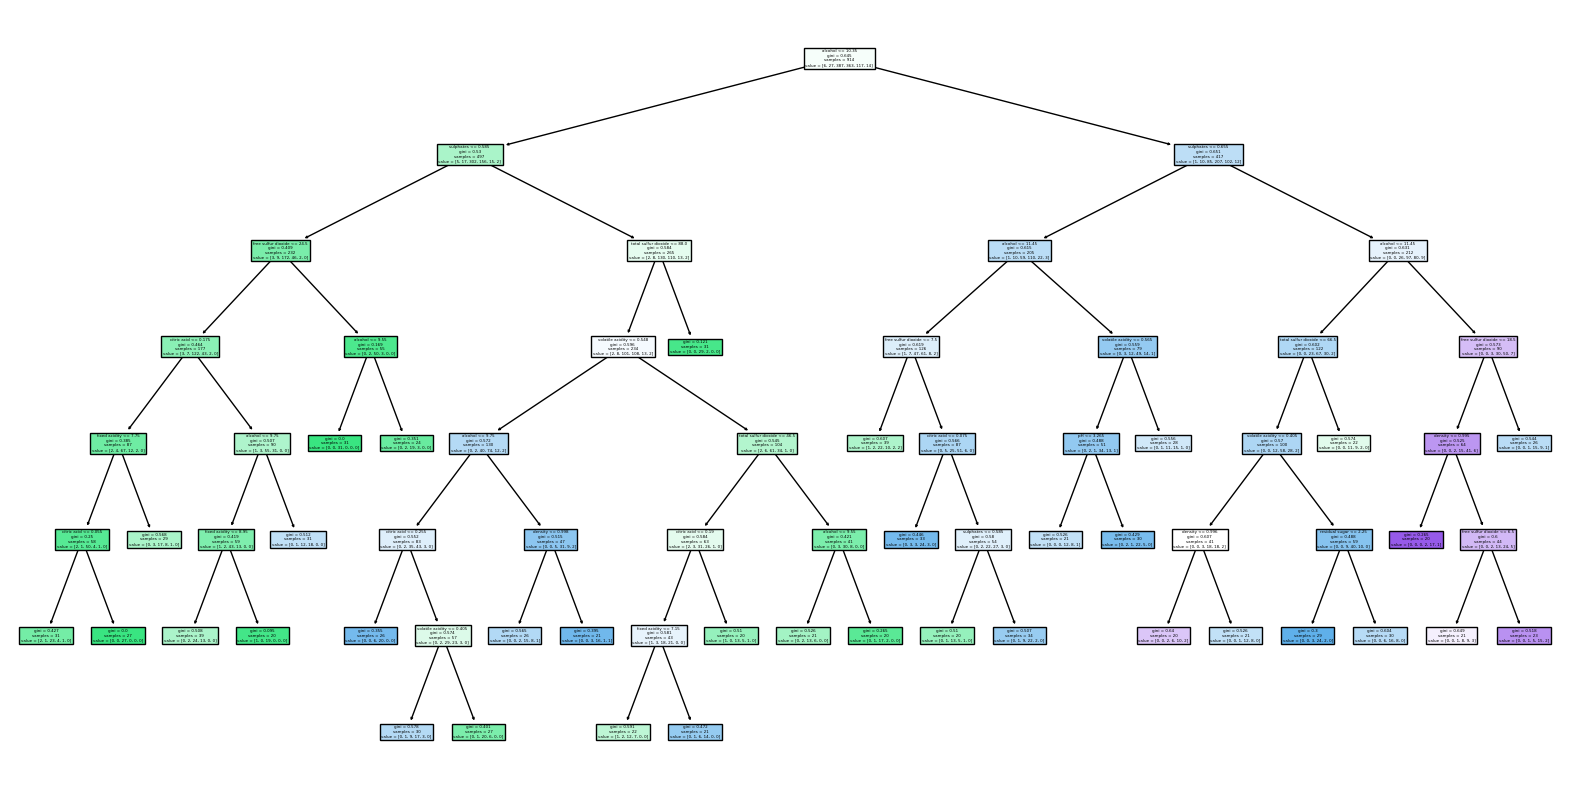

In [39]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(best_tree_clf, filled=True, feature_names=X.columns, ax=ax)
ax.set_xlim(0,6)  # Justera x-axelns gränser för att zooma in
ax.set_ylim(0,10) # Justera y-axelns gränser för att zooma in
plt.show()

# Hur många grenar kommer det maximalt från en nod?

Det maximala antalet grenar som kan komma från en nod i ett beslutsträd är 2. Detta beror på att vid varje intern nod i beslutsträdet delas datamängden upp i två delar baserat på värdet av en enda funktion, vilket resulterar i två barn-noder. Processen fortsätter sedan rekursivt tills alla noder är löv-noder. Eftersom varje intern nod i beslutsträdet bara kan dela upp datamängden i två delar, är det maximala antalet grenar som kan komma från en nod 2.

# Varför är det max så många grenar från en nod?

Orsaken till detta är att beslutsträd bygger på binära uppdelningar, vilket innebär att datamängden delas upp i två delar vid varje intern nod. Detta gör det möjligt för beslutsträdet att skapa en hierarkisk struktur som är lätt att tolka och visualisera, samt effektiv för att göra förutsägelser. Genom att dela upp datamängden i två delar vid varje intern nod kan beslutsträdet snabbt och effektivt klassificera nya data genom att följa rätt väg ner i trädet.

# Utmaning (krävs ej för godkänt eller väl godkänt):
# Kan du skapa en modell som har >0.7 i testscore? Om inte, vad är den bästa score du kan få?

In [40]:
df_better_score = pd.read_csv('WineQT.csv')
df.drop("Id", axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [41]:
# Original quality values 3, 4, 5, and 6 are mapped to 0 (representing low quality).
# Original quality values 7 and 8 are mapped to 1 (representing high quality)
df_better_score['quality'] = df_better_score['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 0,
        7 : 1,
        8 : 1         
})

In [42]:
y = df_better_score['quality']

In [43]:
df_better_score = df.drop('quality', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df_better_score,
    y, 
    test_size = 0.2,
    random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(914, 12) (914,)
(229, 12) (229,)


In [45]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
test_score = accuracy_score(y_test, decision_tree.predict(X_test))
print("Test Score:", test_score)

Test Score: 0.8777292576419214
